# Lyft´s Bay Wheels 2019
## by Jens Klinder

## Investigation Overview
Lyft´s Bay Wheels (formerly known as Ford GoBike) is a bicycle sharing system in the San Francisco Bay Area, California.  Within this project I will analyse the program data for the year 2019. The focus lies on the question how the bike sharing system will be used in terms of date and time. In addition, the two different groups of the system, subcribers and customers, will be investigated. Therefore, I will have a closer look at the question how these two groups are using the bike sharing system in terms of duration and distance. 

## Dataset Overview
Lyft offers the data for their bike sharing system in monthly csv files. The dataset for the year 2019 has about 2.5 million entries. It contains anonymized information about the duration, time, starting and end location of the trip, as well as additional information about the user type. <br>
The individual csv files can be downloaded from Lyft´s website: https://www.lyft.com/bikes/bay-wheels/system-data.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('2019-baywheels-tripdata-clean.csv');

## Distribution of User Types

Nearly 80% of the users are subscribers or members of the bike sharing system while about 20% of the users are other customers. 

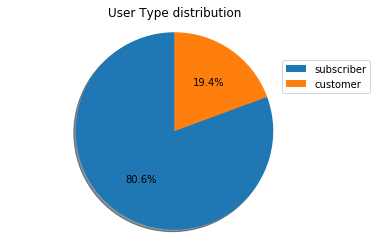

In [3]:
# Pie chart for user type, where the slices will be ordered and plotted counter-clockwise:
labels = 'subscriber', 'customer'
sizes = df_clean.user_type.value_counts()
explode = (0, 0)

#fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, bbox_to_anchor=(1.1,0.75), loc='right')
plt.title('User Type distribution')
plt.show()

## Number of bike shares depending on the day of the week and the time
Within the weekdays the usage of the bike sharing system is almost on the same level, while the number of bike rentals drop down to 54% during the weekend. It seems that the Lyft Bay Wheels system is mainly used by people working during the week. This hypothesis is supported by the fact that the main usage of the bike sharing system is during the week with high peaks between 7am and 9am as well as between 4pm and 8pm. At the weekend, the number of bike rides is reduced and more spread over the midday.

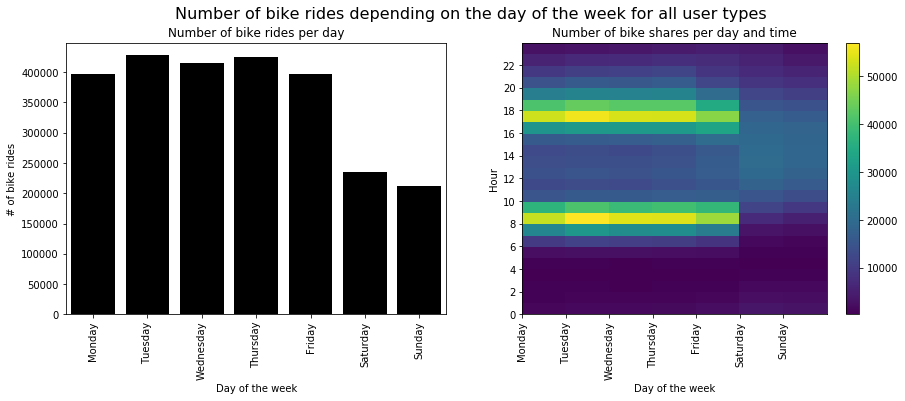

In [7]:
plt.figure(figsize = [15, 5])
plt.suptitle('Number of bike rides depending on the day of the week for all user types', fontsize=16)
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# subscriber: left plot duration
plt.subplot(1, 2, 1)
# bike rides per day of the week
sns.countplot(data = df_clean, x = 'day_of_week', color = 'black');
# plot settings
plt.title('Number of bike rides per day');
plt.ylabel('# of bike rides');
plt.xlabel('Day of the week');
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);


# Right plot
# Number of bike shares depending on the day of the week and the hour
plt.subplot(1, 2, 2)
#general settings
bins_x = np.arange(0, 8, 1)
bins_y = np.arange(0, 25, 1)
ticks_y = np.arange(0, 24, 2)
# plot 2D histogram
plt.hist2d(data = df_clean, x = 'day_of_week', y = 'hour', bins = [bins_x, bins_y])
# plot settings
plt.title('Number of bike shares per day and time')
plt.xlabel('Day of the week');
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Hour');
plt.yticks(ticks_y);
plt.colorbar();

## Duration and distance of the bike shares depending on the day of the week
In general, the main usage of the bike sharing system is for short periods of time and short distances, because about 75% of the users rent the bike for 15min or less. This is in line with the observation that more than 75% of the rented bikes have been used for distances less than 2.3km.
The mean duration of a shared bike is higher during the weekend than the days within the week for all users. At the same time is the mean distance smaller during the weekend than within the week. 
These two results indicate that the users taking more time for smaller distances and are therefore are slower on the bike during the weekend. <br>
Eye-catching is in addition the fact that the mean duration is higher the customers compared to the subscribers, independent of the day of the week or the distance. 

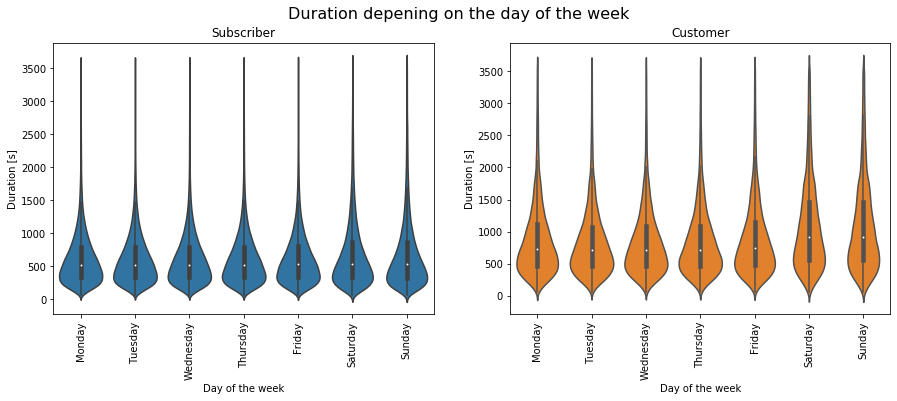

In [5]:
# Duration of the bike shares depending on the day of the week
# Subscriber and Customer

plt.figure(figsize = [15, 5])
plt.suptitle('Duration depening on the day of the week', fontsize=16)
subscriber_color = sns.color_palette()[0]
customer_color = sns.color_palette()[1]

# subscriber: left plot duration
plt.subplot(1, 2, 1)
# create a violinplot taking into account only the data with a duration smaller than 1h (3600s) for a better visualization
sns.violinplot(data = df_clean[df_clean.user_type == 'subscriber'].query('duration_sec < 3600'), x = 'day_of_week', y = 'duration_sec', color = subscriber_color)
# plot settings
plt.title('Subscriber')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Duration [s]');


# customer: right plot duration
plt.subplot(1, 2, 2)
# create a violinplot taking into account only the data with a duration smaller than 1h (3600s) for a better visualization
sns.violinplot(data = df_clean[df_clean.user_type == 'customer'].query('duration_sec < 3600'), x = 'day_of_week', y = 'duration_sec', color = customer_color)
# plot settings
plt.title('Customer')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Duration [s]');

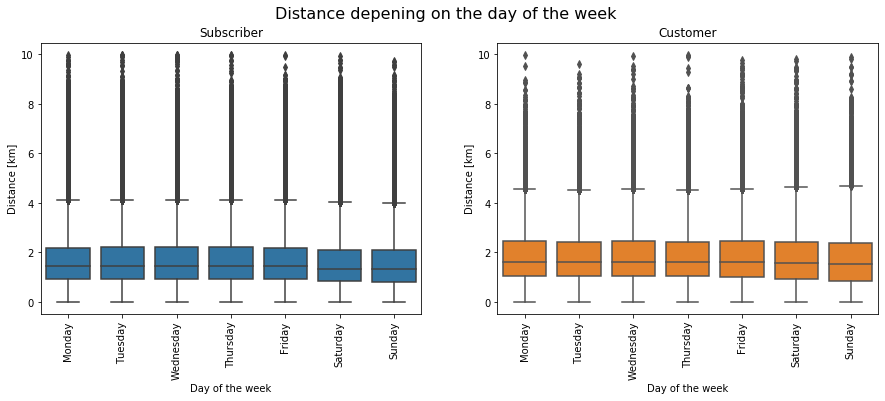

In [6]:
# Distance of the bike shares depending on the day of the week
# Subscriber and Customer

plt.figure(figsize = [15, 5])
plt.suptitle('Distance depening on the day of the week', fontsize=16)
subscriber_color = sns.color_palette()[0]
customer_color = sns.color_palette()[1]

# subscriber: left plot duration
plt.subplot(1, 2, 1)
# create a boxplot taking into account only the data with a distance smaller than 10km for a better visualization
sns.boxplot(data = df_clean[df_clean.user_type == 'subscriber'].query('distance_km < 10'), x = 'day_of_week', y = 'distance_km', color = subscriber_color)
# plot settings
plt.title('Subscriber')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Distance [km]');


# customer: left plot duration
plt.subplot(1, 2, 2)
# create a boxplot taking into account only the data with a distance smaller than 10km for a better visualization
sns.boxplot(data = df_clean[df_clean.user_type == 'customer'].query('distance_km < 10'), x = 'day_of_week', y = 'distance_km', color = customer_color)
# plot settings
plt.title('Customer')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Distance [km]');